# Report of occpollution project
      
The object of this notebook is mainly providing a study that will compare the level of ozone pollution of two cities: Montpellier (Prés d'Arènes urbain and Chaptal urbain) and Paris (13ème) by data visualizations and an ANOVA study. It uses all the deployed methods in this project.

The idea of this report is to answer the following question: *Is there a more polluted city between Montpellier and Paris?*

We will also discuss the subject of containment.

Our indicators of pollution are O3 and NO2 measurements (refer to data section in the documentation to have more information about the role of Ozone in pollution). NO2 has a direct impact on pollution but the O3 effect is indirect.

**Remark**: the main code of this report is in the `utils.py` file.

In [1]:
import warnings; warnings.simplefilter('ignore') # if you don't want useless warning, execute this command

In [2]:
import utils
from ipywidgets import interact
from statsmodels.formula.api import ols
import statsmodels.api as sm

## About our data:

We imported data from these following websites:

http://www.airparif.asso.fr/telechargement/confirme/id/06bb94ba3f23ad75144acf9bce05d014

http://data-atmo-occitanie.opendata.arcgis.com/datasets/4a648b54876f485e92f22e2ad5a5da32_0

Unfortunaly, Occitanie data changed during the project and we can't exploit anymore the date variables, and geographic coordinates are no longer available, that's why we use the last non corrupted data we have. Therefore, the period studied is from 29 April 2019 to 24 April 2020. 

The first website is about Paris data. It contents NO2, O3 and date data.
The second one gives us the Occitanie data which contains Montpellier.

An important data processing is carried out in the `utils.py` file, you may have a look to know more about it.

In [4]:
from utils import mtp, par # importation of data cleaned in the utils.py file

## Data visualizations:

We begin to plot the data in order to check if we can already observe trends

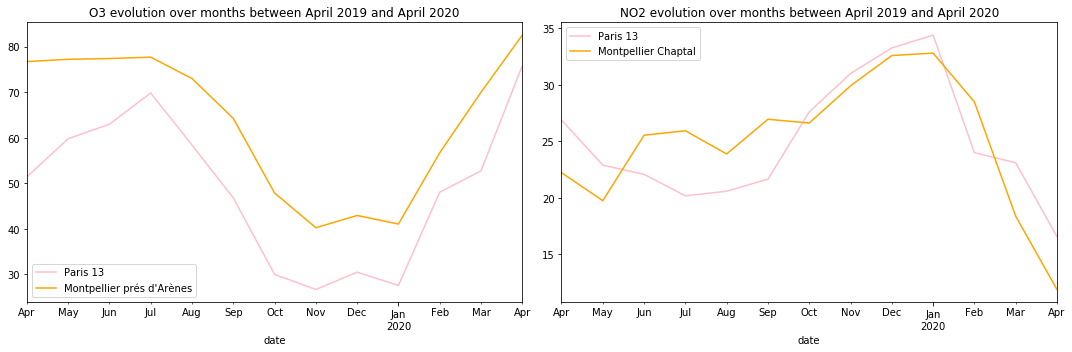

In [5]:
utils.plot_lines()

The first point to note is that the O3 and NO2 trends are completely opposite. For the O3, Montpellier has readily the highest measurement. It's a little more complicated to determine for the NO2 trend.

An interactive boxplot is another way to visualize these data:

In [6]:
interact(utils.boxplot_widget, month=mtp.date.unique(), pollutant=['O3', 'NO2'])

interactive(children=(Dropdown(description='pollutant', options=('O3', 'NO2'), value='O3'), Output()), _dom_cl…

<function utils.boxplot_widget(pollutant)>

## ANOVA for O3 and NO2 between April 2019 and April 2020 with Montpellier and Paris:

ANOVA stands for ANalysis Of Variance. It is a test based on the Fisher test (for variances) which checks whether the mean of different samples / groups is different, taking into account the variance of each samples / groups.
ANOVA, ANalysis Of Variance, compares several population means with each other or compares the variance between group means and the variance within groups to determine whether the groups are all part of a larger population or distinct populations with unique characteristics, so it emphasizes comparison.

Our test is significant at  $\alpha = 0.05$.


In [7]:
from utils import df_ANOVA

In [11]:
results_NO2 = ols('NO2 ~ nom_com', data=df_ANOVA).fit() # ANOVA for NO2 with Montpellier and Paris 
results_O3 = ols('O3 ~ nom_com', data=df_ANOVA).fit() # ANOVA for O3 with Montpellier and Paris 

In [14]:
anova_NO2 = sm.stats.anova_lm(results_NO2, typ=2)
anova_NO2

,sum_sq,df,F,PR(>F)
nom_com,0.022586,1.0,0.000714,0.978907
Residual,759.473549,24.0,NaN,NaN


NO2 measurements don't allow us to conclude that one city is more polluted than the other over the period studied. The p-value is too big!

In [15]:
anova_O3 = sm.stats.anova_lm(results_O3, typ=2)
anova_O3

,sum_sq,df,F,PR(>F)
nom_com,1343.448477,1.0,5.167779,0.032246
Residual,6239.191027,24.0,NaN,NaN


The p-value is very small in this case. This means that the individual effects are not zero. Montpellier is more polluted (based on ozone) than Paris. We were already seeing these results with the data visualization.

## The containment effects:

It might be interesting to ask if containment has an effect on the evolution of pollution. We focus here on Montpellier and NO2 measurements in 2020. You can also observe others measurements but they are not as complete. Recall that containment has started the 13 march 2020.

In [68]:
#from utils import mtp_df 

occitanie = pd.read_csv("datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv", sep="," , header=0)
mtp_df = occitanie[occitanie['nom_com'] == 'MONTPELLIER']
mtp_df['date'] = pd.to_datetime(mtp_df['date_debut']).dt.to_period('D')
mtp_df = mtp_df.sort_values(by = 'date', ascending = True)
variables = ['nom_com', 'nom_station', 'nom_poll', 'valeur', 'date' ]
mtp_df = mtp_df[variables]
mtp_df = mtp_df.iloc[3649:5388,]
mtp_df

,nom_com,nom_station,nom_poll,valeur,date
4823,MONTPELLIER,Montpellier - Pompignane Trafic,NO,49.1,2020-01-01
4829,MONTPELLIER,Montpellier - Chaptal Urbain,NO,32.7,2020-01-01
4830,MONTPELLIER,Montpellier - Prés d Arènes Urbain,NO,46.3,2020-01-01
4833,MONTPELLIER,Montpellier - Pompignane Trafic,NO2,29.3,2020-01-01
4834,MONTPELLIER,Montpellier - Prés d Arènes Urbain,NO2,34.5,2020-01-01
...,...,...,...,...,...
51992,MONTPELLIER,Montpellier - Prés d Arènes Urbain,O3,68.1,2020-04-26
50158,MONTPELLIER,Montpellier - Chaptal Urbain,NO,1.5,2020-04-26
50489,MONTPELLIER,Montpellier - Pompignane Trafic,NO,1.7,2020-04-26
50160,MONTPELLIER,Montpellier - Prés d Arènes Urbain,NO2,4.1,2020-04-26


In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_2020(poll):
    ax = plt.gca()
    mtp[mtp['nom_station']=='Montpellier - Pompignane Trafic'].plot(kind='line',x='date',y=poll,ax=ax, color = 'pink', label = 'Montpellier - Pompignane Trafic')
    mtp[mtp['nom_station']=='Montpellier - Chaptal Urbain'].plot(kind='line',x='date',y=poll,ax=ax, color = 'orange', label = 'Montpellier - Chaptal Urbain')
    plt.title("O3 evolution over time since the beginning of the year")


KeyError: 'NO2'

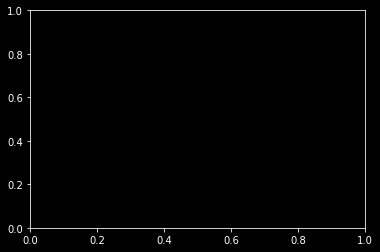

In [70]:
ax = plt.gca()
mtp_df[mtp_df['nom_station']=='Montpellier - Prés d Arènes Urbain'].plot(kind='line',x='date',y='NO2',ax=ax, color = 'pink', label = 'Montpellier - Pompignane Trafic')
mtp_df[mtp_df['nom_station']=='Montpellier - Chaptal Urbain'].plot(kind='line',x='date',y='NO2',ax=ax, color = 'orange', label = 'Montpellier - Chaptal Urbain')
plt.title("O3 evolution over time since the beginning of the year")

In [61]:
mtp_df[mtp_df['nom_station']=='Montpellier - Pompignane Trafic']

,nom_com,nom_station,nom_poll,valeur,date
4823,MONTPELLIER,Montpellier - Pompignane Trafic,NO,49.1,2020-01-01
4833,MONTPELLIER,Montpellier - Pompignane Trafic,NO2,29.3,2020-01-01
4866,MONTPELLIER,Montpellier - Pompignane Trafic,NOX as NO2,104.4,2020-01-01
5054,MONTPELLIER,Montpellier - Pompignane Trafic,PM2.5,34.2,2020-01-01
5048,MONTPELLIER,Montpellier - Pompignane Trafic,PM10,41.0,2020-01-01
...,...,...,...,...,...
50531,MONTPELLIER,Montpellier - Pompignane Trafic,PM2.5,6.5,2020-04-26
50528,MONTPELLIER,Montpellier - Pompignane Trafic,NOX as NO2,7.8,2020-04-26
50523,MONTPELLIER,Montpellier - Pompignane Trafic,PM10,9.6,2020-04-26
50490,MONTPELLIER,Montpellier - Pompignane Trafic,NO2,5.1,2020-04-26
